In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the Data

In [2]:
df = pd.read_csv(r"C:\Users\Hi\Downloads\reviews_data_dump\reviews_badminton\data.csv")
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


# Shape of data

In [3]:
df.shape   

(8518, 8)

In [4]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [5]:
#correcting col_names
df.columns = df.columns.str.strip()
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


# Check for missing values

In [7]:
print(df.isnull().sum())

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64


# Handling missing values

In [8]:
df.fillna({'Reviewer Name': 'missing', 
           'Review Title': 'No title', 
           'Place of Review': 'unknown', 
           'Up Votes': df['Up Votes'].median(), 
           'Down Votes': df['Down Votes'].median(), 
           'Month': 'Unknown'}, 
          inplace=True)


In [9]:
print(df.isnull().sum())

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        8
Ratings            0
dtype: int64


In [10]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,Unknown,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,unknown,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,missing,No title,unknown,0.0,0.0,Unknown,NaN,5
8514,missing,No title,unknown,0.0,0.0,Unknown,NaN,2
8515,missing,No title,unknown,0.0,0.0,Unknown,NaN,4
8516,missing,No title,unknown,0.0,0.0,Unknown,NaN,1


# converting data types

In [11]:
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')

In [12]:
df['Up Votes'] = df['Up Votes'].astype(int)
df['Down Votes'] = df['Down Votes'].astype(int)

In [13]:
df.columns = df.columns.str.replace(' ', '_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Reviewer_Name    8518 non-null   object        
 1   Review_Title     8518 non-null   object        
 2   Place_of_Review  8518 non-null   object        
 3   Up_Votes         8518 non-null   int32         
 4   Down_Votes       8518 non-null   int32         
 5   Month            8053 non-null   datetime64[ns]
 6   Review_text      8510 non-null   object        
 7   Ratings          8518 non-null   int64         
dtypes: datetime64[ns](1), int32(2), int64(1), object(4)
memory usage: 466.0+ KB


# Statistics

In [14]:
print(df.describe())


          Up_Votes   Down_Votes      Ratings
count  8518.000000  8518.000000  8518.000000
mean      0.390937     0.121625     4.181028
std      11.607097     3.246117     1.262200
min       0.000000     0.000000     1.000000
25%       0.000000     0.000000     4.000000
50%       0.000000     0.000000     5.000000
75%       0.000000     0.000000     5.000000
max     889.000000   219.000000     5.000000


In [15]:
print(df['Ratings'].value_counts())

5    5080
4    1746
1     769
3     615
2     308
Name: Ratings, dtype: int64


# Data Vizualisation

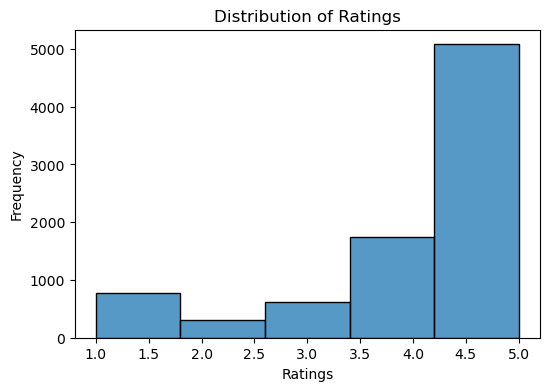

In [16]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Ratings'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

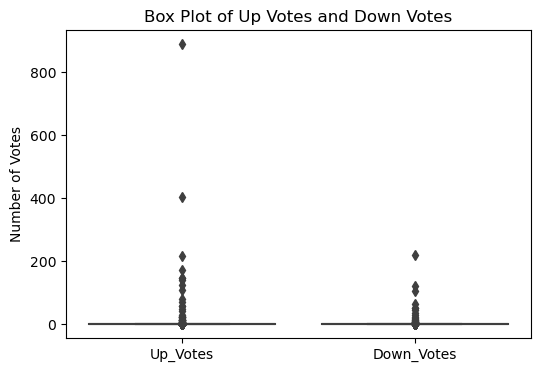

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['Up_Votes', 'Down_Votes']])
plt.title('Box Plot of Up Votes and Down Votes')
plt.ylabel('Number of Votes')
plt.show()

# Bivariate

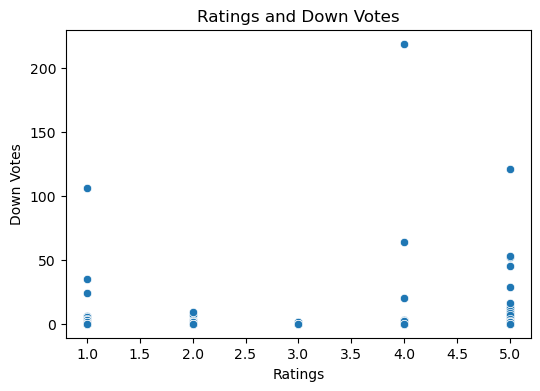

In [18]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Ratings', y='Down_Votes')
plt.title('Ratings and Down Votes')
plt.xlabel('Ratings')
plt.ylabel('Down Votes')
plt.show()

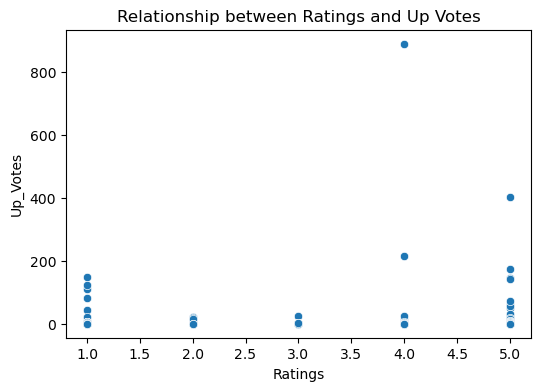

In [19]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Ratings', y='Up_Votes')
plt.title('Relationship between Ratings and Up Votes')
plt.xlabel('Ratings')
plt.ylabel('Up_Votes')
plt.show()

In [20]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hi\AppData\Roaming\nltk_data...


True

In [21]:
sent_analyz = SentimentIntensityAnalyzer()

In [22]:
def get_sentiment(text):
    # Check if the text is not NaN
    if isinstance(text, str):
        scores = sent_analyz.polarity_scores(text)
        if scores['compound'] > 0:
            return 'Positive'
        elif scores['compound'] < 0:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral'

In [23]:
df['sentiment'] = df['Review_text'].apply(get_sentiment)

In [24]:
df['sentiment'].value_counts(normalize=True)

Positive    0.467598
Neutral     0.438835
Negative    0.093567
Name: sentiment, dtype: float64

In [25]:
df = df[df.sentiment != "Neutral"]
df.shape

(4780, 9)

In [26]:

df['sentiment'].value_counts(normalize=True)

Positive    0.833264
Negative    0.166736
Name: sentiment, dtype: float64

In [27]:
sent_map = {'Positive': 1, 'Negative': 0}

# Mapping sentiment categories
df['sentiment_num'] = df['sentiment'].map(sent_map)

print(df[['sentiment', 'sentiment_num']].head())


  sentiment  sentiment_num
0  Positive              1
1  Negative              0
2  Negative              0
3  Positive              1
4  Positive              1


C:\Users\Hi\AppData\Local\Temp\ipykernel_18416\3740601243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_num'] = df['sentiment'].map(sent_map)


In [28]:
X = df.Review_text 
y = df.sentiment_num 
print(X.shape, y.shape)

(4780,) (4780,)


# data splitting

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3585,) (3585,)
(1195,) (1195,)


# Step 3 - Data Pre-processing on train data

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

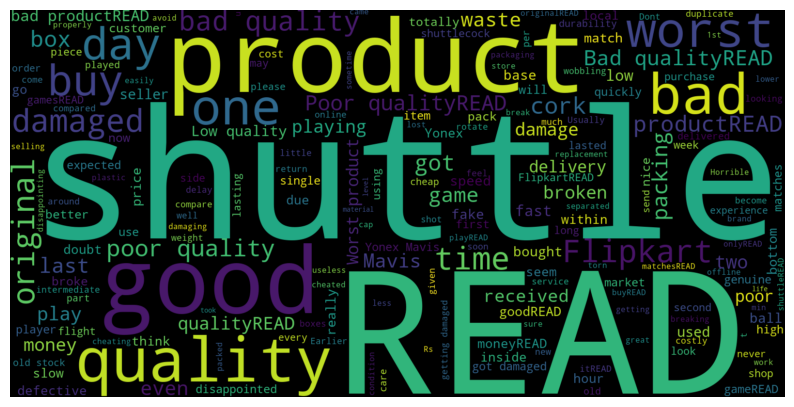

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#word cloud
def display_wordcloud(data):
    wc = WordCloud(background_color='black', width=1600, height=800).generate(' '.join(data))
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()
display_wordcloud(X_train[y_train ==0])


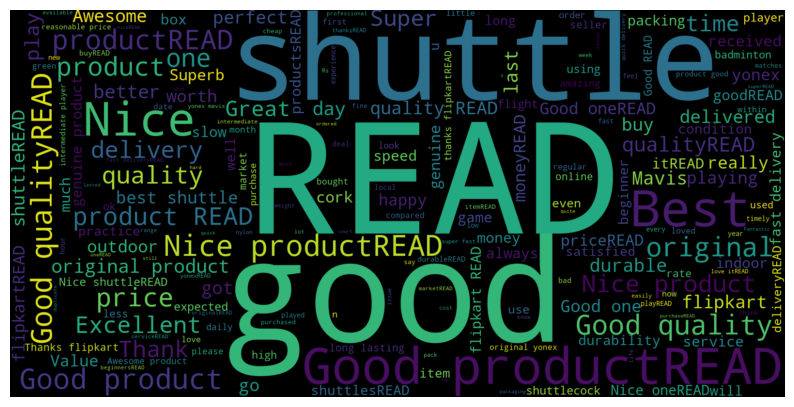

In [32]:
display_wordcloud(X_train[y_train==1])

In [33]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [34]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
def clean(doc):
    doc = doc.replace("</br>", " ")
    # Remove chars.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    
    # Join and return
    return " ".join(filtered_tokens)

In [36]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=clean)

# use it to extract features from training data
X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

(3585, 2547)


In [38]:
X_test_dtm = vect.transform(X_test)
print(X_test_dtm.shape)

(1195, 2547)


# model Building

In [39]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB() 
%time nb.fit(X_train_dtm, y_train) # train the model

CPU times: total: 0 ns
Wall time: 4.99 ms


MultinomialNB()

# Step 6 - Evaluating on Train Data

In [40]:
# Step 6: Evaluate on train data

from sklearn import metrics
# make class predictions for X_train_dtm
y_pred = nb.predict(X_train_dtm)

metrics.accuracy_score(y_train, y_pred)

0.9617852161785216

Text(0.5, 23.52222222222222, 'Predicted')

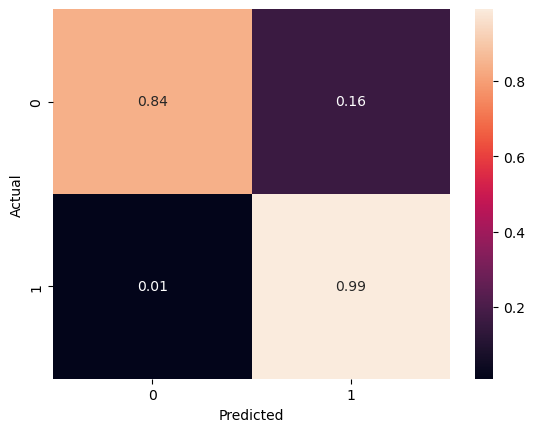

In [41]:
cm = metrics.confusion_matrix(y_train, y_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')


Evaluating on test data

In [42]:
metrics.confusion_matrix(y_train, y_pred)

array([[ 503,   99],
       [  38, 2945]], dtype=int64)

In [43]:
y_test_pred = nb.predict(X_test_dtm)
metrics.accuracy_score(y_test, y_test_pred)

0.9372384937238494

Text(0.5, 23.52222222222222, 'Predicted')

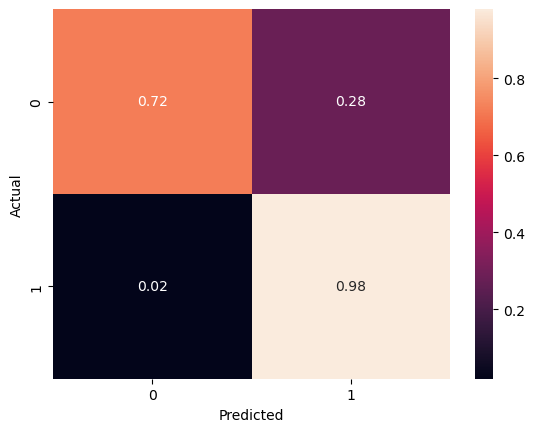

In [44]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [45]:
print("Train Score (F1 Score):", metrics.f1_score(y_train, y_pred))

print("Test Score (F1 Score):", metrics.f1_score(y_test, y_test_pred))

Train Score (F1 Score): 0.977268956363033
Test Score (F1 Score): 0.9631087063453025


# clearly we got good result with our model

# Creating an Optimal Workflow

In [46]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [47]:
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ]
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [{'vectorization__preprocessor' : [clean],
                   'vectorization__max_features' : MAX_FEATURES, 
                   'nb__alpha' : ALPHA}]

clf = GridSearchCV(
    estimator=pipe, 
    param_grid=parameter_grid, 
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 2min 21s
Wall time: 2min 26s
Best estimator found on train set
Pipeline(steps=[('vectorization',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function clean at 0x0000022AEA54D240>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9642857142857142


# checking time

In [48]:
import joblib
from joblib import Memory

import os

In [49]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ], 
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__preprocessor': [clean],
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 1min 29s
Wall time: 1min 29s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function clean at 0x0000022AEA54D240>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9642857142857142


In [50]:
import os
os.getcwd()

'C:\\Users\\Hi\\Downloads\\flipkart_intern'

In [52]:
# Serialization

best_model = clf.best_estimator_

joblib.dump(best_model, r'C:\Users\Hi\Downloads\flipkart_intern\nb.pkl')

['C:\\Users\\Hi\\Downloads\\flipkart_intern\\nb.pkl']

# 'Positive'  = 1 , 'Negative' = 0.

In [60]:
model = joblib.load('C:\\\\Users\\\\Hi\\\\Downloads\\\\flipkart_intern\\nb.pkl')
%time y_test_pred = model.predict(X_test)
print("Test Score (F1):", metrics.f1_score(y_test, y_pred_t))

CPU times: total: 641 ms
Wall time: 668 ms


NameError: name 'y_pred_t' is not defined

In [55]:
%time X_train_clean = X_train.apply(lambda doc: clean(doc))

CPU times: total: 1.81 s
Wall time: 1.81 s


In [56]:
%time X_test_clean = X_test.apply(lambda doc: clean(doc))

CPU times: total: 625 ms
Wall time: 646 ms


In [57]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ], 
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train_clean, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_clean, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 6.97 s
Wall time: 7.25 s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9642857142857142


In [61]:
# Serialization

best_model = clf.best_estimator_

joblib.dump(best_model, 'C:\\\\Users\\\\Hi\\\\Downloads\\\\flipkart_intern\\nb.pkl')

['C:\\\\Users\\\\Hi\\\\Downloads\\\\flipkart_intern\\nb.pkl']

In [62]:
# Let's analyse the models prediction time and model size

%time y_test_pred = model.predict(X_test_clean)

print("Test Score (F1):", metrics.f1_score(y_test, y_test_pred))

CPU times: total: 656 ms
Wall time: 671 ms
Test Score (F1): 0.9642857142857142


# finding best model

In [63]:
import warnings

warnings.filterwarnings('ignore')

In [64]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train_clean, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 4.72 s
Wall time: 4.81 s
Score on Test Data:  0.9642857142857142
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 26.5 s
Wall time: 27.7 s
Score on Test Data:  0.9601941747572815
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 4min 19s
Wall time: 4min 30s
Score on Test Data:  0.9590818363273452


In [65]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.6,
                                    penalty='elasticnet', solver='saga'))])



In [67]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'C:\\\\Users\\\\Hi\\\\Downloads\\\\flipkart_intern\\{name}.pkl')
    model = joblib.load(f'C:\\\\Users\\\\Hi\\\\Downloads\\\\flipkart_intern\\{name}.pkl')
    
    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred))

********** naive_bayes **********
CPU times: total: 15.6 ms
Wall time: 14 ms
Test Score (F1) 0.9642857142857142
********** decision_tree **********
CPU times: total: 15.6 ms
Wall time: 8.98 ms
Test Score (F1) 0.9601941747572815
********** logistic_regression **********
CPU times: total: 15.6 ms
Wall time: 9.97 ms
Test Score (F1) 0.9590818363273452


#logistic regression is good for this